In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

C:\Users\mayan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [5]:
print(df['state'].unique())

['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Uttar Pradesh' 'Uttarakhand' 'Uttaranchal'
 'West Bengal' 'andaman-and-nicobar-islands' 'Lakshadweep' 'Tripura']


In [6]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [7]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [8]:
df.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

# Preprocessing

In [9]:
df.drop(['stn_code','agency','sampling_date','location_monitoring_station'], axis = 1, inplace = True)

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [11]:
#To fix the missing values for pollutants, we will use Imputer class(mean)
from sklearn.impute import SimpleImputer

In [12]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(df.iloc[:,3:8].values)
df.iloc[:,3:8] = imputer.transform(df.iloc[:,3:8].values)

In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       435742 non-null  float64
 4   no2       435742 non-null  float64
 5   rspm      435742 non-null  float64
 6   spm       435742 non-null  float64
 7   pm2_5     435742 non-null  float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,40.791467,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,40.791467,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,40.791467,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01


In [14]:
common_value='Residential,Rural and other Areas'
df['type'] = df['type'].fillna(common_value)

In [15]:
df.isna().sum()

state       0
location    3
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        7
dtype: int64

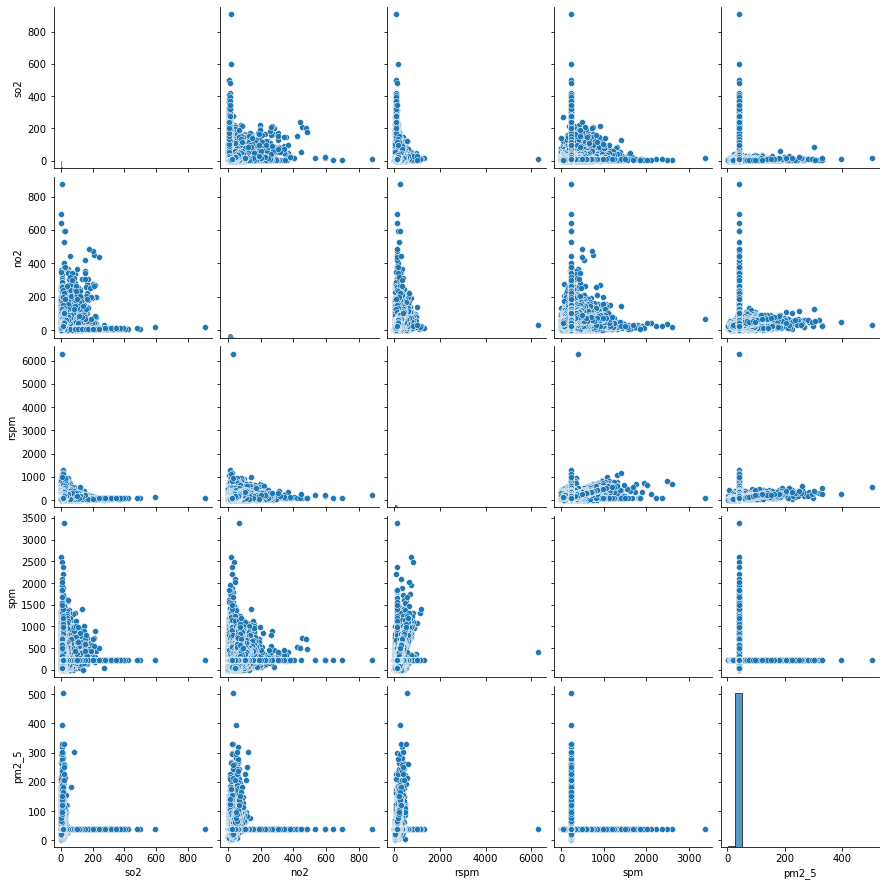

In [16]:
sns.pairplot(df)

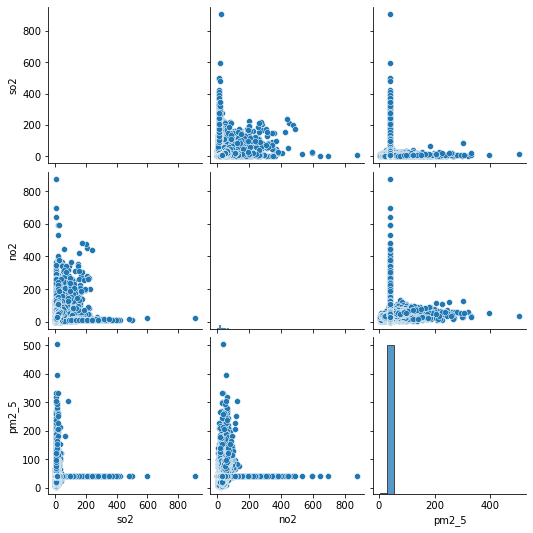

In [17]:
sns.pairplot(df[['so2','no2','pm2_5']])

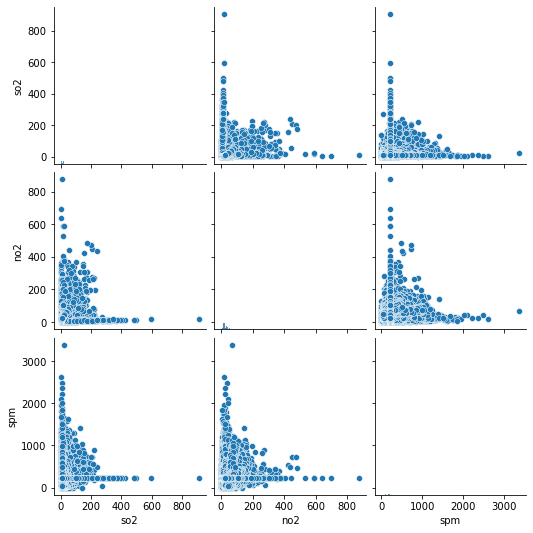

In [18]:
sns.pairplot(df[['so2','no2','spm']])

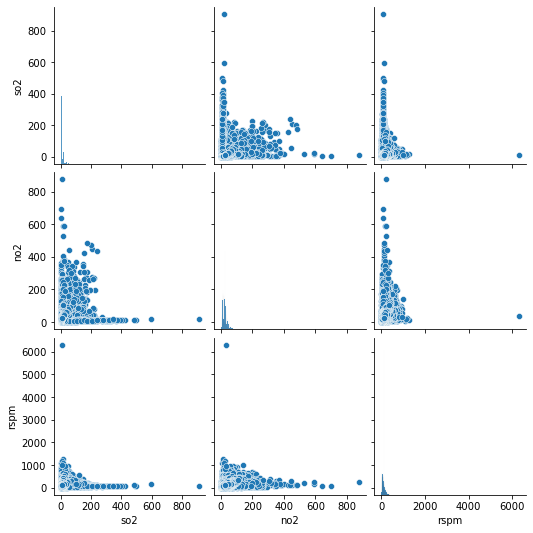

In [19]:
sns.pairplot(df[['so2','no2','rspm']])

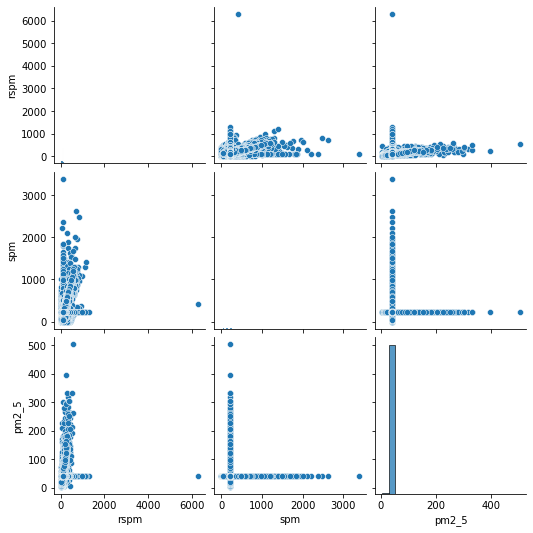

In [20]:
sns.pairplot(df[['rspm','spm','pm2_5']])

<AxesSubplot:>

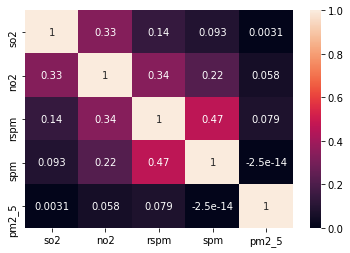

In [21]:
sns.heatmap(df.loc[:,['state','so2', 'no2', 'rspm', 'spm', 'pm2_5']].corr(), annot =True)

<AxesSubplot:xlabel='state'>

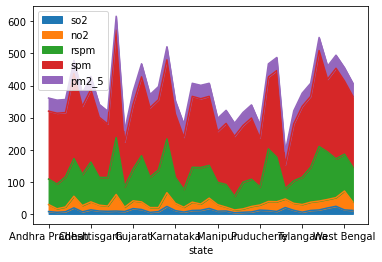

In [22]:
#as per the highest emmission
state_em = df.groupby('state').mean()[['so2', 'no2', 'rspm', 'spm', 'pm2_5']]
state_em.plot.area()

In [23]:
state_em.describe()

,so2,no2,rspm,spm,pm2_5
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,10.834792,23.431668,101.593288,210.929962,40.705551
std,5.125288,10.747456,35.590723,46.301498,0.963178
min,3.695303,8.531134,32.000000,75.000000,35.878344
25%,7.239967,15.891551,79.507951,187.344003,40.791467
50%,10.257348,22.781418,97.130375,215.037496,40.791467
75%,12.517750,26.800000,117.547025,226.072782,40.791467
max,23.724520,58.852111,177.293687,334.814468,43.148310


In [24]:
Top10States_with_highest_No2=state_em.sort_values(by='no2',ascending=False).head(10)
Top10States_with_highest_No2_sorted=Top10States_with_highest_No2.loc[:,['no2']]
Top10States_with_highest_No2_sorted.head

<bound method NDFrame.head of                      no2
state                   
West Bengal    58.852111
Delhi          51.728223
Jharkhand      42.975080
Bihar          36.173283
Maharashtra    31.988282
Rajasthan      30.375851
Punjab         28.044733
Uttar Pradesh  27.548280
Uttaranchal    27.068044
Sikkim         26.800000>

In [25]:
Top10States_with_highest_So2=state_em.sort_values(by='so2',ascending=False).head(10)
Top10States_with_highest_So2_sorted=Top10States_with_highest_So2.loc[:,['so2']]
Top10States_with_highest_So2_sorted.head

<bound method NDFrame.head of                     so2
state                  
Uttaranchal   23.724520
Jharkhand     23.235550
Sikkim        19.800000
Bihar         18.825122
Uttarakhand   18.571542
Maharashtra   17.143621
Gujarat       16.631424
Haryana       13.799113
Chhattisgarh  12.717299
West Bengal   12.517750>

In [26]:
Top10States_with_highest_rspm=state_em.sort_values(by='rspm',ascending=False).head(10)
Top10States_with_highest_rspm_sorted=Top10States_with_highest_rspm.loc[:,['rspm']]
Top10States_with_highest_rspm_sorted.head

<bound method NDFrame.head of                      rspm
state                    
Delhi          177.293687
Uttar Pradesh  170.096762
Jharkhand      167.607687
Punjab         163.842751
Uttarakhand    148.078126
Haryana        143.898317
Rajasthan      138.599740
Chhattisgarh   124.068943
Uttaranchal    120.791774
Bihar          117.547025>

In [27]:
Top10States_with_highest_spm=state_em.sort_values(by='spm',ascending=False).head(10)
Top10States_with_highest_spm_sorted=Top10States_with_highest_spm.loc[:,['spm']]
Top10States_with_highest_spm_sorted.head

<bound method NDFrame.head of                       spm
state                    
Delhi          334.814468
Uttar Pradesh  298.972557
Uttaranchal    282.238307
Rajasthan      270.046908
Bihar          264.703658
Jharkhand      246.335689
Haryana        245.634816
West Bengal    228.150079
Uttarakhand    226.483025
Chhattisgarh   226.072782>

In [28]:
Top10States_with_highest_pm2_5=state_em.sort_values(by='pm2_5',ascending=False).head(10)
Top10States_with_highest_pm2_5_sorted=Top10States_with_highest_pm2_5.loc[:,['pm2_5']]
Top10States_with_highest_pm2_5_sorted.head

<bound method NDFrame.head of                     pm2_5
state                    
Delhi           43.148310
Madhya Pradesh  41.801628
West Bengal     41.478083
Telangana       41.074227
Odisha          40.995751
Maharashtra     40.791467
Uttar Pradesh   40.791467
Andhra Pradesh  40.791467
Punjab          40.791467
Rajasthan       40.791467>

In [29]:
loc_em = df.groupby('location').mean()[['so2','no2','rspm','spm','pm2_5']]

In [30]:
Top10Cities_with_highest_NO2=loc_em.sort_values(by='no2',ascending=False).head(10)
Top10Cities_with_highest_NO2_sorted=Top10Cities_with_highest_NO2.loc[:,['no2']]
Top10Cities_with_highest_NO2_sorted.head()

,no2
location,
Howrah,77.225862
Badlapur,64.451282
Dombivli,60.483941
Kolkata,60.192063
Ulhasnagar,59.783158


In [31]:
Top10Cities_with_highest_SO2=loc_em.sort_values(by='so2',ascending=False).head(10)
Top10Cities_with_highest_SO2_sorted=Top10Cities_with_highest_SO2.loc[:,['so2']]
Top10Cities_with_highest_SO2_sorted.head()

,so2
location,
Byrnihat,45.475065
Gajroula,38.471050
Jamshedpur,38.101352
Nanded,38.078791
Dharuhera,37.800000


In [32]:
Top10Cities_with_highest_rspm=loc_em.sort_values(by='rspm',ascending=False).head(10)
Top10Cities_with_highest_rspm_sorted=Top10Cities_with_highest_rspm.loc[:,['rspm']]
Top10Cities_with_highest_rspm_sorted.head()

,rspm
location,
West Singhbhum,246.417219
Ghaziabad,241.417037
Allahabad,230.739709
Bareilly,229.932926
Ludhiana,211.272161


In [33]:
Top10Cities_with_highest_spm=loc_em.sort_values(by='spm',ascending=False).head(10)
Top10Cities_with_highest_spm_sorted=Top10Cities_with_highest_spm.loc[:,['spm']]
Top10Cities_with_highest_spm_sorted.head()

,spm
location,
Meerut,445.722841
"Noida, Ghaziabad",439.581514
Dehradoon,384.270123
Noida,352.723920
Dharuhera,339.000000


In [34]:
Top10Cities_with_highest_pm2_5=loc_em.sort_values(by='pm2_5',ascending=False).head(10)
Top10Cities_with_highest_pm2_5_sorted=Top10Cities_with_highest_pm2_5.loc[:,['pm2_5']]
Top10Cities_with_highest_pm2_5_sorted.head()

,pm2_5
location,
Bhopal,45.123252
Barrackpore,45.073784
Gwalior,45.032045
Keonjhar,44.565789
Durgapur,43.651873


C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mayan\anaconda3\lib\si

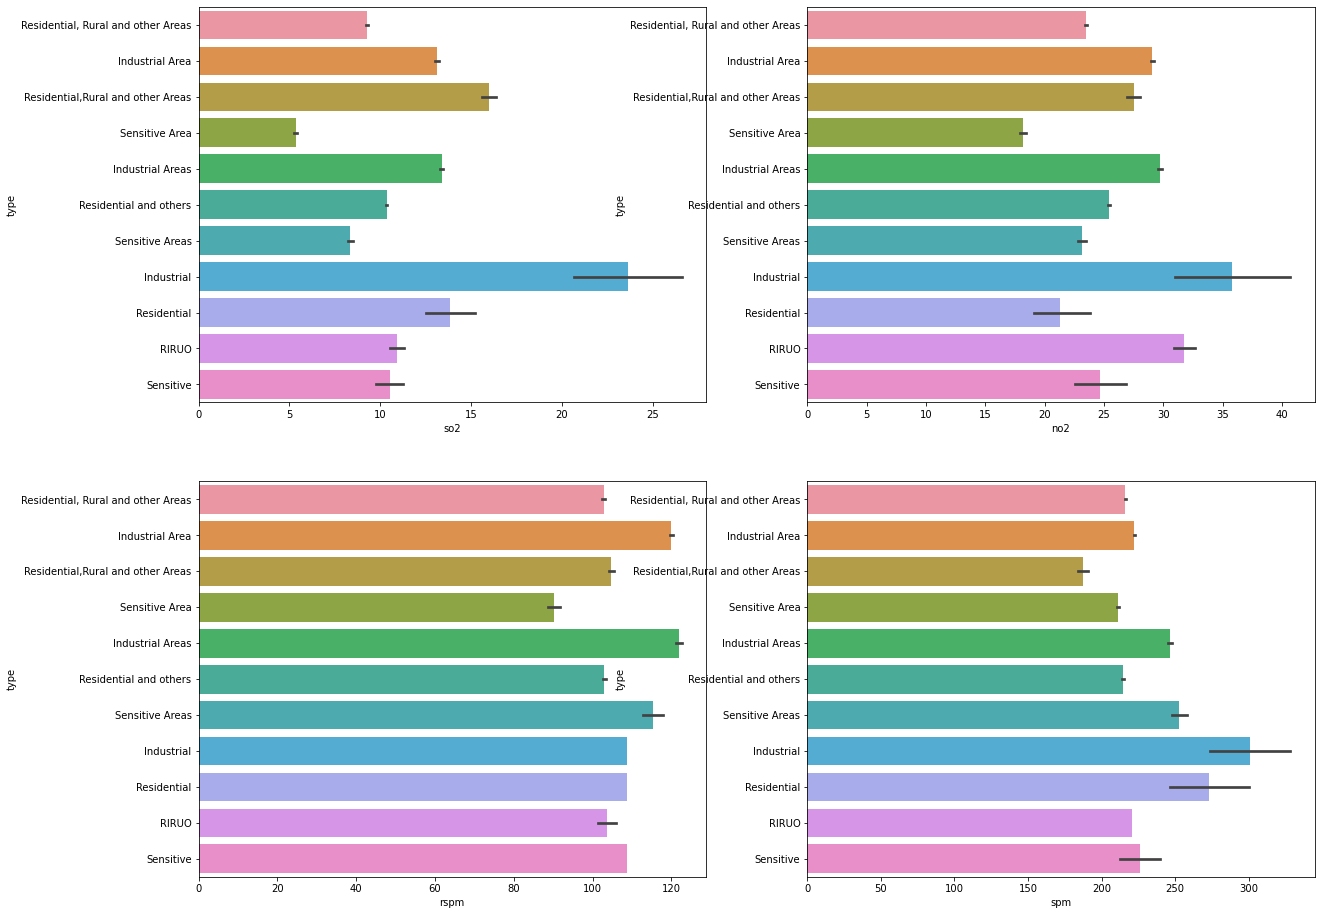

In [35]:
fig, axes= plt.subplots(nrows = 2, ncols = 2, figsize = (20,16))
ax = sns.barplot('so2', y = 'type', data = df, ax = axes[0,0])
ax = sns.barplot('no2', y = 'type', data = df, ax = axes[0,1])
ax = sns.barplot('rspm', y = 'type', data = df, ax = axes[1,0])
ax = sns.barplot('spm', y = 'type', data = df, ax = axes[1,1])

In [36]:
#emission with time
df['date'].describe()

count         435735
unique          5067
top       2015-03-19
freq             253
Name: date, dtype: object

In [37]:
df.head()
common_value_date='2015-03-19'
df['date'] = df['date'].fillna(common_value_date)

In [38]:
df.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
435737,West Bengal,ULUBERIA,RIRUO,22.000000,50.000000,143.000000,220.78348,40.791467,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.000000,46.000000,171.000000,220.78348,40.791467,2015-12-29
435739,andaman-and-nicobar-islands,NaN,"Residential,Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,2015-03-19
435740,Lakshadweep,NaN,"Residential,Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,2015-03-19
435741,Tripura,NaN,"Residential,Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,2015-03-19


In [39]:
date_em_SO2=df.groupby('date').mean()['so2']
date_em_NO2=df.groupby('date').mean()['no2']
date_em_rspm=df.groupby('date').mean()['rspm']
date_em_spm=df.groupby('date').mean()['spm']

<AxesSubplot:xlabel='date'>

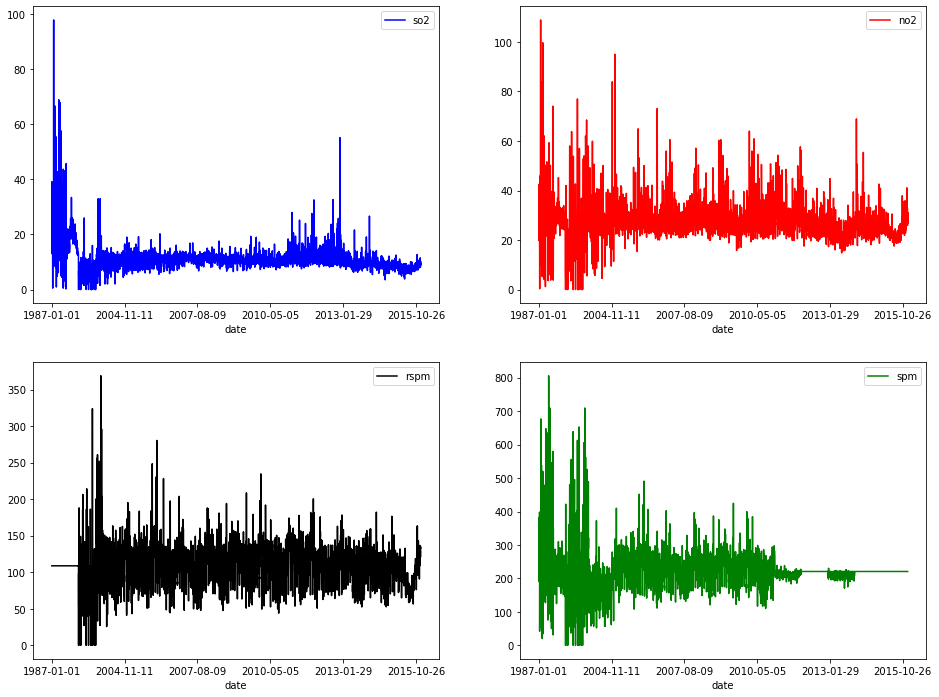

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
date_em_SO2.plot(style = 'b', legend = True, ax = axes[0,0])
date_em_NO2.plot(style = 'r', legend = True, ax = axes[0,1])
date_em_rspm.plot(style = 'k', legend = True, ax = axes[1,0])
date_em_spm.plot(style = 'g', legend = True, ax = axes[1,1])

In [41]:
#Stats for higher emmision with date
df['date'] = pd.to_datetime(df.date, format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435742 non-null  object        
 1   location  435739 non-null  object        
 2   type      435742 non-null  object        
 3   so2       435742 non-null  float64       
 4   no2       435742 non-null  float64       
 5   rspm      435742 non-null  float64       
 6   spm       435742 non-null  float64       
 7   pm2_5     435742 non-null  float64       
 8   date      435742 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 29.9+ MB


In [42]:
#converting column date into index
df=df.set_index('date')

In [43]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5
date,,,,,,,,
1990-02-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,40.791467
1990-02-01,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,40.791467
1990-02-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,40.791467
1990-03-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,40.791467
1990-03-01,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,40.791467


In [44]:
yearly=df.resample('Y').mean()
monthly=df.resample('M').mean()
weekly=df.resample('W').mean()
daily=df.resample('D').mean()

<AxesSubplot:title={'center':'Daily Emmissions Distribution'}>

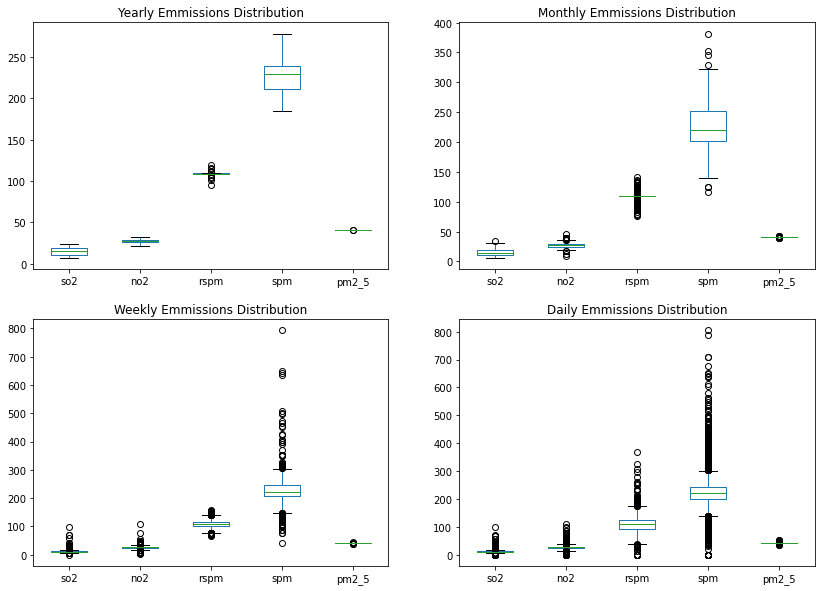

In [45]:
fig,axes2=plt.subplots(nrows=2,ncols=2, figsize=(14,10))
yearly.plot.box(ax=axes2[0,0],title='Yearly Emmissions Distribution')
monthly.plot.box(ax=axes2[0,1],title='Monthly Emmissions Distribution')
weekly.plot.box(ax=axes2[1,0],title='Weekly Emmissions Distribution')
daily.plot.box(ax=axes2[1,1],title='Daily Emmissions Distribution')

# Insights found from this dataset:-
    1. There is some independency between So2 & No2 but no trend can be seen for pm2.5.
    2. There is some relation of spm with No2 & So2
    3. rspm is independent of So2 & No2 as per this dataset.
    4. As per the data, all three(No2,So2,pm2.5) are very less independency.
    5. As per the distance plot, So2 has more broder graph and has more emission.
    6. As per the heatmap of So2, No2, rspm, spm, pm2.5, first highest correlation is between rspm & spm. Secound highest correlaton is between No2 & rspm.
    7. From the areaplot we found that highest emission is of spm for each state.
    8. Top 5 states in decending order for No2 emission are West Bengal, Delhi, Jharkhand, Bihar, Maharastra.
    9. Top 5 states in decending order for So2 emission are Uttranchal, Jharkhand, Sikkim, Bihar, Uttrakhand.
    10. Top 5 states in decending order for rspm emission are Delhi, UP, Jharkhand, Punjab, Uttrakhand.
    11. Top 5 states in decending order for spm emission are Delhi, UP, Uttranchal, Rajasthan, Bihar.
    12. Top 5 states in decending order for pm2.5 emission are Delhi, MP,West Bengal, Telangana, Odisha.
    13. Top 5 locations in decending order for No2 emission are Howrah, Badlapur, Dombivli, Kolkata, Ulhasnagar.
    14. Top 5 locations in decending order for So2 emission are Byrnihat, Gajroula, Jamshedpur, Nanded, Dharuhera.
    15. Top 5 locations in decending order for rspm emission are West Singhbhum, Ghaziabad, Allahabad, Bareilly, Ludhiana.
    16. Top 5 location in decending order for spm emission are Meerut, Gaziabad, Dehradun, Noida, Dharuhera.
    17. Top 5 location in decending order for pm2.5 emission are Bhopal,Barrackpore, Gwalior, Keonjihar, Durgapur.
    18. Major contribution of So2, No2, rspm, spm are from Industial , Industrial, Industrial Areas & from Industrail respectivelly. 
    19. As per the graphs, emmision of spm is reduced from 01-01-1998 to 26-10-2015.
    20. If we see the emission from Yearly - Monthly - Weekly - Daily basis higher number of outliers are there for spm.